<a href="https://colab.research.google.com/github/HyeJeongIm/BP_Project/blob/main/BP_hv1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py
# from vis.visualization import visualize_cam, overlay
from tensorflow.keras import activations
#from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow.compat.v1 as tf
import tensorflow.keras as keras
# from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, Adagrad,Adadelta
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
from scipy import io
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.0 (v3.7.0:1bf9cc5093, Jun 27 2018, 04:59:51) [MSC v.1914 64 bit (AMD64)]
TensorFlow version :  2.3.0
Keras version :  2.4.0


In [ ]:
import numpy as np
from scipy import io

# 데이터 파일 불러오기
train_data = io.loadmat('C:/Users/82109/Desktop/imhz/data/h_v1/train_shuffled_raw_v1.mat')
test_data = io.loadmat('C:/Users/82109/Desktop/imhz/data/h_v1/test_not_shuffled_raw_v1.mat')

X_train = train_data['data_shuffled']
X_test = test_data['data_not_shuffled']

sbp_train = train_data['sbp_total']
sbp_test = test_data['sbp_total']
dbp_train = train_data['dbp_total']
dbp_test = test_data['dbp_total']


In [ ]:
print(X_train.shape)
print(X_test.shape) 

print(sbp_train.shape)
print(sbp_test.shape)
print(dbp_train.shape)
print(dbp_test.shape)

(166415, 36)
(29269, 36)
(166415, 1)
(29269, 1)
(166415, 1)
(29269, 1)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd

df_train_raw = pd.DataFrame(X_train)
df_train_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,260.031256,0.166250,0.58625,0.108750,0.08375,0.060000,0.055000,0.467500,0.187500,0.091250,...,0.445000,0.172500,0.091250,0.076250,0.562500,0.260000,0.155000,0.133750,0.614192,0.348660
1,247.917536,0.166250,0.57500,0.108750,0.08375,0.060000,0.053750,0.447500,0.172500,0.086250,...,0.465625,0.168125,0.086875,0.073125,0.581875,0.258750,0.151250,0.131875,0.593663,0.335900
2,253.789909,0.163750,0.57500,0.106875,0.08250,0.058750,0.053750,0.450625,0.183125,0.090000,...,0.460000,0.183750,0.098750,0.082500,0.570000,0.276250,0.166250,0.142500,0.702310,0.380963
3,252.278748,0.168750,0.58875,0.108750,0.08500,0.061250,0.055000,0.456250,0.176250,0.088750,...,0.432500,0.169375,0.090000,0.076250,0.546875,0.261250,0.153750,0.133750,0.574484,0.331242
4,256.550298,0.170625,0.59125,0.111250,0.08625,0.061250,0.055625,0.460625,0.186875,0.092500,...,0.421875,0.168125,0.091875,0.077500,0.537500,0.258750,0.156875,0.136250,0.722804,0.394318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,393.388904,0.273750,0.84875,0.168750,0.12500,0.083750,0.075000,0.607500,0.251250,0.146250,...,0.636250,0.456875,0.197500,0.171875,0.808125,0.575625,0.283750,0.249375,0.643935,0.339343
99,398.002860,0.325000,0.78750,0.181250,0.12375,0.083750,0.075000,0.623750,0.272500,0.153750,...,0.576250,0.283750,0.153750,0.132500,0.745000,0.408750,0.238750,0.208750,0.575827,0.315949
100,398.973396,0.287500,0.80250,0.171250,0.12375,0.083750,0.075000,0.603750,0.256250,0.152500,...,0.575000,0.364375,0.162500,0.140000,0.743125,0.491875,0.248750,0.217500,0.618326,0.326485
101,392.341511,0.335000,0.77625,0.175000,0.12500,0.083750,0.075000,0.592500,0.255000,0.147500,...,0.570000,0.351250,0.165625,0.143750,0.743750,0.477500,0.251250,0.220625,0.600506,0.318283


In [ ]:
df_test_raw = pd.DataFrame(X_test)
df_test_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,297.062256,0.162500,0.616250,0.106250,0.082500,0.058750,0.053750,0.491250,0.228750,0.101250,...,0.491250,0.228750,0.101250,0.07875,0.5975,0.31125,0.161250,0.132500,0.789459,0.447898
1,280.140984,0.175000,0.623750,0.112500,0.087500,0.062500,0.056250,0.452500,0.207500,0.102500,...,0.491250,0.228750,0.101250,0.07875,0.5975,0.31125,0.161250,0.132500,0.789459,0.447898
2,286.474035,0.163125,0.639375,0.107500,0.083125,0.059375,0.054375,0.471875,0.208125,0.097500,...,0.491250,0.228750,0.101250,0.07875,0.5975,0.31125,0.161250,0.132500,0.789459,0.447898
3,296.949890,0.160000,0.648750,0.107500,0.083750,0.058750,0.053750,0.513750,0.221250,0.107500,...,0.491250,0.228750,0.101250,0.07875,0.5975,0.31125,0.161250,0.132500,0.789459,0.447898
4,319.620796,0.170000,0.635000,0.111250,0.086250,0.062500,0.056250,0.522500,0.275000,0.118750,...,0.491250,0.228750,0.101250,0.07875,0.5975,0.31125,0.161250,0.132500,0.789459,0.447898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,279.673567,0.178750,0.640625,0.116250,0.089375,0.063750,0.057500,0.513750,0.176250,0.084375,...,0.549375,0.213125,0.084375,0.07125,0.6600,0.29875,0.146875,0.126875,0.649722,0.318253
99,306.671042,0.170000,0.636250,0.110000,0.085625,0.060625,0.055625,0.532500,0.211875,0.089375,...,0.549375,0.213125,0.084375,0.07125,0.6600,0.29875,0.146875,0.126875,0.649722,0.318253
100,297.227546,0.166875,0.650000,0.109375,0.084375,0.060625,0.055000,0.535000,0.189375,0.085000,...,0.549375,0.213125,0.084375,0.07125,0.6600,0.29875,0.146875,0.126875,0.649722,0.318253
101,297.057388,0.173750,0.646250,0.113125,0.087500,0.062500,0.056875,0.525000,0.190625,0.087500,...,0.549375,0.213125,0.084375,0.07125,0.6600,0.29875,0.146875,0.126875,0.649722,0.318253


# SBP

## 1

In [ ]:
total_me = 0
total_std = 0

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def build_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    return model
    
model_SBP = build_model()
model_SBP.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                2368      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,SGD

#parameter
batch_size = 32
epoch = 100
learning_rate = 0.01

model_SBP.compile(loss = 'mse', optimizer = Adam(lr = learning_rate))
# model_SBP.summary()
history = model_SBP.fit(X_train, sbp_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, sbp_test))


Epoch 1/100
5201/5201 [==============================] - 5s 905us/step - loss: 348.6057 - val_loss: 243.4475
Epoch 2/100
5201/5201 [==============================] - 5s 911us/step - loss: 185.8531 - val_loss: 703.6746
Epoch 3/100
5201/5201 [==============================] - 5s 874us/step - loss: 180.7066 - val_loss: 362.8182
Epoch 4/100
5201/5201 [==============================] - 5s 899us/step - loss: 176.5699 - val_loss: 201.6138
Epoch 5/100
5201/5201 [==============================] - 5s 887us/step - loss: 173.1027 - val_loss: 208.7765
Epoch 6/100
5201/5201 [==============================] - 5s 906us/step - loss: 169.2388 - val_loss: 421.9398
Epoch 7/100
5201/5201 [==============================] - 5s 886us/step - loss: 165.8264 - val_loss: 221.5729
Epoch 8/100
5201/5201 [==============================] - 5s 894us/step - loss: 164.4005 - val_loss: 347.9635
Epoch 9/100
5201/5201 [==============================] - 4s 858us/step - loss: 162.4133 - val_loss: 393.4490
Epoch 10/100
5201/5

In [ ]:
pred = model_SBP.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


# ME:  -0.8880920576794858 
# MAE:  10.110658528005178 
# SD:  13.582695622538372


ME:  -0.8880920576794858 
MAE:  10.110658528005178 
SD:  13.582695622538372


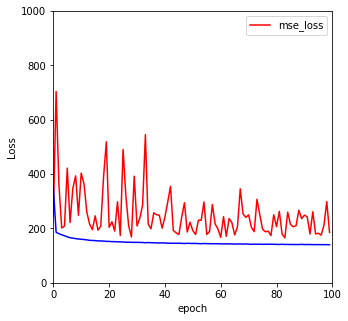

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epoch, 0, 1000])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def build_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))  
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    return model
    
model_SBP2 = build_model()
model_SBP2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                2368      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
activation_6 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
activation_7 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,SGD

#parameter
batch_size = 32
epoch = 100
learning_rate = 0.001

model_SBP2.compile(loss = 'mse', optimizer = Adam(lr = learning_rate))
# model_SBP.summary()
history = model_SBP2.fit(X_train, sbp_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, sbp_test))



Epoch 1/100
5201/5201 [==============================] - 6s 1ms/step - loss: 1270.2181 - val_loss: 213.6772
Epoch 2/100
5201/5201 [==============================] - 6s 1ms/step - loss: 185.0764 - val_loss: 1231.5331
Epoch 3/100
5201/5201 [==============================] - 6s 1ms/step - loss: 179.6411 - val_loss: 248.9944
Epoch 4/100
5201/5201 [==============================] - 6s 1ms/step - loss: 173.8427 - val_loss: 323.7600
Epoch 5/100
5201/5201 [==============================] - 6s 1ms/step - loss: 170.6302 - val_loss: 288.7877
Epoch 6/100
5201/5201 [==============================] - 6s 1ms/step - loss: 167.6842 - val_loss: 305.2148
Epoch 7/100
5201/5201 [==============================] - 6s 1ms/step - loss: 165.2605 - val_loss: 223.0946
Epoch 8/100
5201/5201 [==============================] - 6s 1ms/step - loss: 163.2151 - val_loss: 469.9742
Epoch 9/100
5201/5201 [==============================] - 6s 1ms/step - loss: 161.1751 - val_loss: 206.8120
Epoch 10/100
5201/5201 [===========

In [ ]:
pred = model_SBP2.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


# ME:  2.3008194141952036 
# MAE:  9.823266679938868 
# SD:  13.02950061522532


ME:  2.3008194141952036 
MAE:  9.823266679938868 
SD:  13.02950061522532


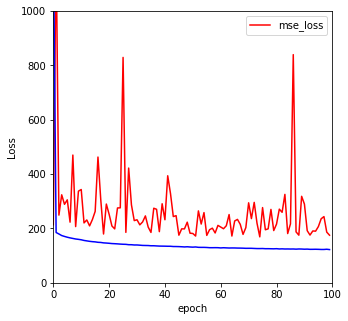

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epoch, 0, 1000])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def build_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))  
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    return model
    
model_SBP2 = build_model()
model_SBP2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                2368      
_________________________________________________________________
batch_normalization_10 (Batc (None, 64)                256       
_________________________________________________________________
activation_10 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_11 (Batc (None, 64)                256       
_________________________________________________________________
activation_11 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,SGD

#parameter
batch_size = 32
epoch = 200
learning_rate = 0.001

model_SBP.compile(loss = 'mse', optimizer = Adam(lr = learning_rate))
# model_SBP.summary()
history = model_SBP.fit(X_train, sbp_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, sbp_test))


Epoch 1/200
5201/5201 [==============================] - 5s 937us/step - loss: 135.0451 - val_loss: 150.9042
Epoch 2/200
5201/5201 [==============================] - 5s 936us/step - loss: 134.4276 - val_loss: 153.7107
Epoch 3/200
5201/5201 [==============================] - 5s 923us/step - loss: 134.3963 - val_loss: 147.5344
Epoch 4/200
5201/5201 [==============================] - 5s 943us/step - loss: 134.6244 - val_loss: 148.1585
Epoch 5/200
5201/5201 [==============================] - 5s 951us/step - loss: 134.2630 - val_loss: 146.9270
Epoch 6/200
5201/5201 [==============================] - 5s 914us/step - loss: 134.5055 - val_loss: 146.0578
Epoch 7/200
5201/5201 [==============================] - 5s 948us/step - loss: 133.3854 - val_loss: 147.3911
Epoch 8/200
5201/5201 [==============================] - 5s 899us/step - loss: 133.8955 - val_loss: 150.5328
Epoch 9/200
5201/5201 [==============================] - 5s 948us/step - loss: 133.9467 - val_loss: 147.2974
Epoch 10/200
5201/5

In [ ]:
pred = model_SBP.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


# ME:  -0.20655137256061798 
# MAE:  8.736114286842694 
# SD:  12.082522321943067


ME:  -0.20655137256061798 
MAE:  8.736114286842694 
SD:  12.082522321943067


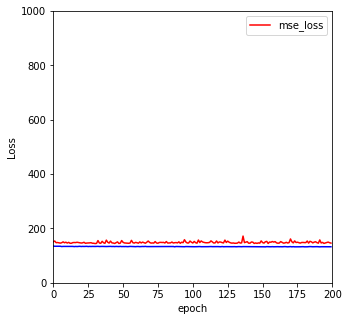

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epoch, 0, 1000])
fig = plt.gcf()

batch size는 32 일때가 최적이다 

## 4

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def build_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))  
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    return model
    
model_SBP2 = build_model()
model_SBP2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                2368      
_________________________________________________________________
batch_normalization_14 (Batc (None, 64)                256       
_________________________________________________________________
activation_14 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_15 (Batc (None, 64)                256       
_________________________________________________________________
activation_15 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,SGD

#parameter
batch_size = 32
epoch = 300
learning_rate = 0.001

model_SBP.compile(loss = 'mse', optimizer = Adam(lr = learning_rate))
# model_SBP.summary()
history = model_SBP.fit(X_train, sbp_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, sbp_test))


Epoch 1/300
5201/5201 [==============================] - 5s 907us/step - loss: 132.1691 - val_loss: 150.1409
Epoch 2/300
5201/5201 [==============================] - 5s 892us/step - loss: 132.5952 - val_loss: 146.4950
Epoch 3/300
5201/5201 [==============================] - 5s 916us/step - loss: 132.3549 - val_loss: 146.7797
Epoch 4/300
5201/5201 [==============================] - 5s 905us/step - loss: 132.5496 - val_loss: 153.6616
Epoch 5/300
5201/5201 [==============================] - 5s 874us/step - loss: 132.5021 - val_loss: 146.3128
Epoch 6/300
5201/5201 [==============================] - 5s 882us/step - loss: 132.8623 - val_loss: 145.9408
Epoch 7/300
5201/5201 [==============================] - 5s 901us/step - loss: 132.4830 - val_loss: 146.7182
Epoch 8/300
5201/5201 [==============================] - 5s 922us/step - loss: 132.5221 - val_loss: 159.5817
Epoch 9/300
5201/5201 [==============================] - 5s 917us/step - loss: 132.4628 - val_loss: 147.0005
Epoch 10/300
5201/5

In [ ]:
pred = model_SBP.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


# ME:  7.9854436717721455 
# MAE:  12.17038882271132 
# SD:  13.5069653065601


ME:  1.2690671866028076 
MAE:  8.791128839298564 
SD:  12.098189981772805


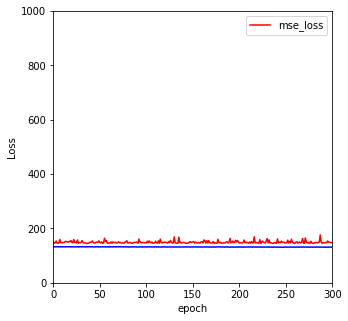

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epoch, 0, 1000])
fig = plt.gcf()

## 5

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def build_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))  
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    return model
    
model_SBP2 = build_model()
model_SBP2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                2368      
_________________________________________________________________
batch_normalization_18 (Batc (None, 64)                256       
_________________________________________________________________
activation_18 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_19 (Batc (None, 64)                256       
_________________________________________________________________
activation_19 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,SGD

#parameter
batch_size = 16
epoch = 200
learning_rate = 0.001

model_SBP.compile(loss = 'mse', optimizer = Adam(lr = learning_rate))
# model_SBP.summary()
history = model_SBP.fit(X_train, sbp_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, sbp_test))


Epoch 1/200
10401/10401 [==============================] - 9s 889us/step - loss: 144.5503 - val_loss: 153.3499
Epoch 2/200
10401/10401 [==============================] - 9s 866us/step - loss: 144.7708 - val_loss: 148.2712
Epoch 3/200
10401/10401 [==============================] - 9s 871us/step - loss: 143.7626 - val_loss: 147.5875
Epoch 4/200
10401/10401 [==============================] - 9s 845us/step - loss: 144.4267 - val_loss: 157.9368
Epoch 5/200
10401/10401 [==============================] - 9s 847us/step - loss: 144.5799 - val_loss: 152.2765
Epoch 6/200
10401/10401 [==============================] - 9s 873us/step - loss: 144.3503 - val_loss: 145.8047
Epoch 7/200
10401/10401 [==============================] - 9s 847us/step - loss: 143.9450 - val_loss: 154.1359
Epoch 8/200
10401/10401 [==============================] - 9s 899us/step - loss: 143.7529 - val_loss: 150.8286
Epoch 9/200
10401/10401 [==============================] - 9s 869us/step - loss: 143.9458 - val_loss: 148.8720
E

In [ ]:
pred = model_SBP.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)



# ME:  -3.487038146637009 
# MAE:  9.748998527800413 
# SD:  12.177435829595252


ME:  -3.487038146637009 
MAE:  9.748998527800413 
SD:  12.177435829595252


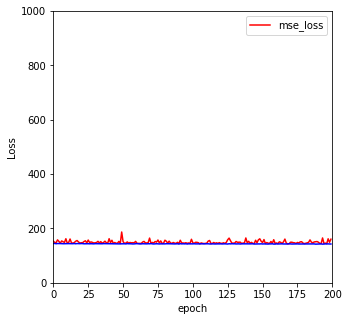

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epoch, 0, 1000])
fig = plt.gcf()

In [ ]:
#sbp_err_idx_high = np.where((abs(err) >= 10))
#np.savetxt("C:/Users/mina/Desktop/CSP/BP/BP/CART_pkl/New_CART_ppg_ir/Err_hist/set4_ppg_ir_without_ref_10_idx_high_sbp.txt", sbp_err_idx_high, fmt = '%d', delimiter=',')

In [ ]:
Ensemble_me = total_me/5
Ensemble_std = total_std/5

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -2.5040195015384867 
Ensemble_std:  13.847933178647143


## 6 

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def build_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))  
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    return model
    
model_SBP2 = build_model()
model_SBP2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 64)                2368      
_________________________________________________________________
batch_normalization_38 (Batc (None, 64)                256       
_________________________________________________________________
activation_38 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_39 (Batc (None, 64)                256       
_________________________________________________________________
activation_39 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,SGD

#parameter
batch_size = 32
epoch = 200
learning_rate = 0.001

model_SBP.compile(loss = 'mse', optimizer = Adam(lr = learning_rate))
# model_SBP.summary()
history = model_SBP.fit(X_train, sbp_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, sbp_test))


Epoch 1/200
5201/5201 [==============================] - 5s 960us/step - loss: 129.7236 - val_loss: 150.4473
Epoch 2/200
5201/5201 [==============================] - 5s 905us/step - loss: 129.3401 - val_loss: 162.8097
Epoch 3/200
5201/5201 [==============================] - 5s 917us/step - loss: 129.3698 - val_loss: 156.2618
Epoch 4/200
5201/5201 [==============================] - 5s 932us/step - loss: 129.5646 - val_loss: 152.4632
Epoch 5/200
5201/5201 [==============================] - 5s 902us/step - loss: 129.4677 - val_loss: 144.4976
Epoch 6/200
5201/5201 [==============================] - 5s 911us/step - loss: 129.4471 - val_loss: 148.3072
Epoch 7/200
5201/5201 [==============================] - 5s 906us/step - loss: 129.4716 - val_loss: 145.0137
Epoch 8/200
5201/5201 [==============================] - 5s 887us/step - loss: 129.2377 - val_loss: 152.2659
Epoch 9/200
5201/5201 [==============================] - 5s 897us/step - loss: 129.1050 - val_loss: 146.3924
Epoch 10/200
5201/5

In [ ]:
pred = model_SBP.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


# ME:  6.800765103145049 
# MAE:  11.795270132307712 
# SD:  14.233791200044193


ME:  0.6731970073437484 
MAE:  8.647903201434863 
SD:  11.963422452912603


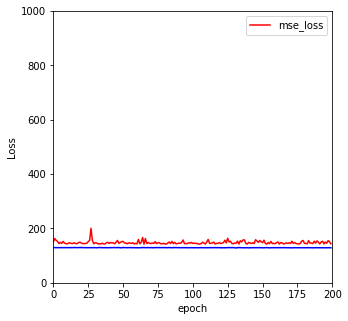

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epoch, 0, 1000])
fig = plt.gcf()

In [ ]:
#sbp_err_idx_high = np.where((abs(err) >= 10))
#np.savetxt("C:/Users/mina/Desktop/CSP/BP/BP/CART_pkl/New_CART_ppg_ir/Err_hist/set4_ppg_ir_without_ref_10_idx_high_sbp.txt", sbp_err_idx_high, fmt = '%d', delimiter=',')

In [ ]:
Ensemble_me = total_me/5
Ensemble_std = total_std/5

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -1.143866480909477 
Ensemble_std:  16.69469141865598


## 7 (dense(4))

In [ ]:
total_me = 0
total_std = 0

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def build_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))  
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    return model
    
model_SBP2 = build_model()
model_SBP2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 64)                2368      
_________________________________________________________________
batch_normalization_48 (Batc (None, 64)                256       
_________________________________________________________________
activation_48 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_49 (Batc (None, 64)                256       
_________________________________________________________________
activation_49 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 64)              

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,SGD

#parameter
batch_size = 32
epoch = 200
learning_rate = 0.001

model_SBP.compile(loss = 'mse', optimizer = Adam(lr = learning_rate))
# model_SBP.summary()
history = model_SBP.fit(X_train, sbp_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, sbp_test))


Epoch 1/200
5201/5201 [==============================] - 5s 889us/step - loss: 128.6904 - val_loss: 143.5476
Epoch 2/200
5201/5201 [==============================] - 5s 902us/step - loss: 129.2542 - val_loss: 145.9788
Epoch 3/200
5201/5201 [==============================] - 5s 913us/step - loss: 128.9133 - val_loss: 159.4920
Epoch 4/200
5201/5201 [==============================] - 5s 899us/step - loss: 128.8289 - val_loss: 152.9500
Epoch 5/200
5201/5201 [==============================] - 5s 887us/step - loss: 128.6866 - val_loss: 145.2266
Epoch 6/200
5201/5201 [==============================] - 5s 907us/step - loss: 128.9008 - val_loss: 146.0276
Epoch 7/200
5201/5201 [==============================] - 5s 895us/step - loss: 129.1848 - val_loss: 148.2579
Epoch 8/200
5201/5201 [==============================] - 5s 908us/step - loss: 129.2074 - val_loss: 144.7117
Epoch 9/200
5201/5201 [==============================] - 5s 889us/step - loss: 128.9286 - val_loss: 150.2360
Epoch 10/200
5201/5

In [ ]:
pred = model_SBP.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


# ME:  -2.4202556167442344 
# MAE:  9.157946333778934 
# SD:  12.066823720813296


ME:  -2.4202556167442344 
MAE:  9.157946333778934 
SD:  12.066823720813296


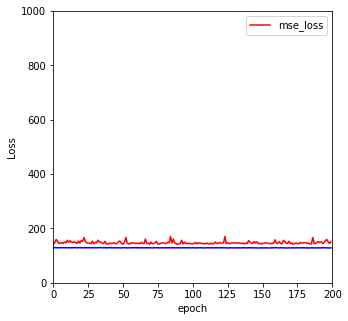

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epoch, 0, 1000])
fig = plt.gcf()

## 8


In [ ]:
total_me = 0
total_std = 0

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def build_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],)))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))  
    
    model.add(Dense(64))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    
    
    model.add(Dense(1))
    return model
    
model_SBP2 = build_model()
model_SBP2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 64)                2368      
_________________________________________________________________
dense_75 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_63 (Batc (None, 64)                256       
_________________________________________________________________
activation_63 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_77 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_64 (Batc (None, 64)              

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,SGD

#parameter
batch_size = 32
epoch = 200
learning_rate = 0.001

model_SBP.compile(loss = 'mse', optimizer = Adam(lr = learning_rate))
# model_SBP.summary()
history = model_SBP.fit(X_train, sbp_train, batch_size = batch_size, epochs = epoch, validation_data=(X_test, sbp_test))


Epoch 1/200
5201/5201 [==============================] - 5s 902us/step - loss: 128.3925 - val_loss: 148.6349
Epoch 2/200
5201/5201 [==============================] - 5s 873us/step - loss: 128.7518 - val_loss: 143.7084
Epoch 3/200
5201/5201 [==============================] - 5s 885us/step - loss: 128.6031 - val_loss: 146.1542
Epoch 4/200
5201/5201 [==============================] - 5s 877us/step - loss: 128.4769 - val_loss: 153.6405
Epoch 5/200
5201/5201 [==============================] - 5s 882us/step - loss: 128.4650 - val_loss: 150.2936
Epoch 6/200
5201/5201 [==============================] - 5s 895us/step - loss: 128.8834 - val_loss: 151.0045
Epoch 7/200
5201/5201 [==============================] - 5s 902us/step - loss: 128.6935 - val_loss: 142.5834
Epoch 8/200
5201/5201 [==============================] - 5s 898us/step - loss: 128.6681 - val_loss: 143.2954
Epoch 9/200
5201/5201 [==============================] - 5s 881us/step - loss: 128.2910 - val_loss: 155.3150
Epoch 10/200
5201/5

In [ ]:
pred = model_SBP.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)

# ME:  -0.2947758469780435 
# MAE:  9.818598407487531 
# SD:  13.19426213934431


ME:  0.7050894222259282 
MAE:  8.730976042856787 
SD:  11.997817086572004


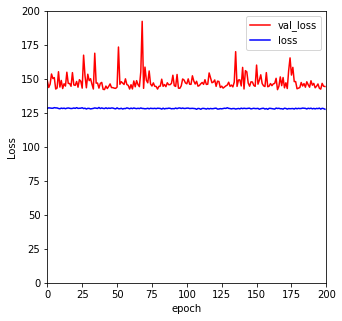

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['val_loss','loss'])

plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epoch, 0, 200])
fig = plt.gcf()